# Exercise: Linear Regression

Implementing Linear Regression on a [advertising dataset](https://www.statlearning.com/s/Advertising.csv) where _TV_, _radio_ and _newspaper_ are adevertising mediums (input variables) and _sales_ is output variable. 

In [1]:
# Import necessary libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from IPython.display import display, HTML

In [2]:
data_path = "https://www.statlearning.com/s/Advertising.csv"

# Read csv_data using pandas df 
df = pd.read_csv(data_path, index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
df.shape

(200, 4)

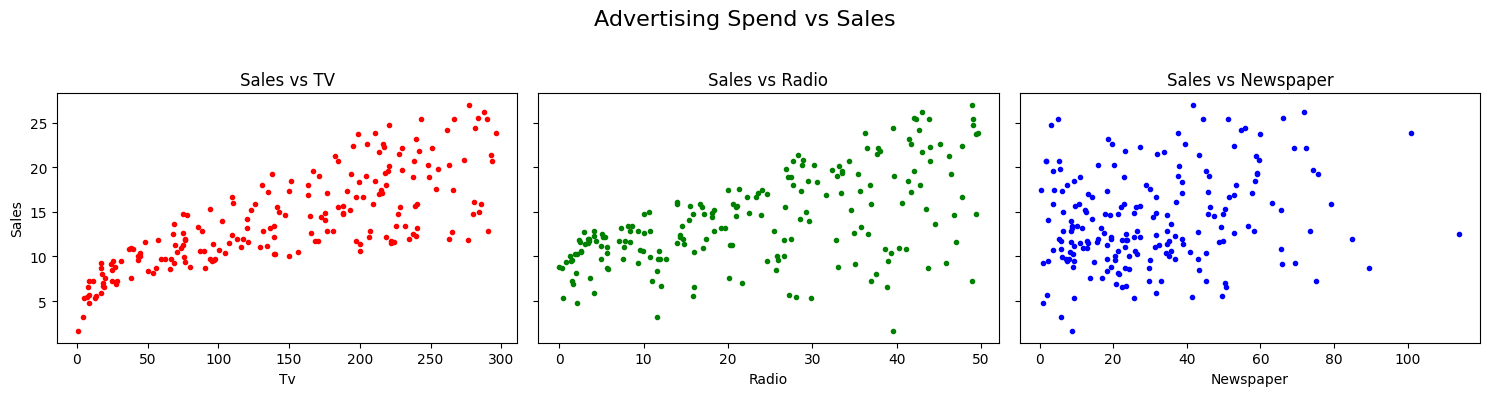

In [4]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4), sharey=True)
colors = ['red', 'green', 'blue']
titles = ['Sales vs TV', 'Sales vs Radio', 'Sales vs Newspaper']
columns = ['TV', 'radio', 'newspaper']

for ax, color, title, column in zip(axs, colors, titles, columns):
    ax.scatter(df[column], df["sales"], color=color, marker=".")
    ax.set_xlabel(column.capitalize())
    ax.set_ylabel("Sales" if column == 'TV' else "")
    ax.set_title(title)

fig.suptitle('Advertising Spend vs Sales', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

From the first and second plot, we can see that there is sharp upward trend in the no of units sold as TV and radio advertising increases. However, for newspaper there seems no relationship between its advertisement and units sold.  

### Simple Linear Regression with OLS (from scratch)

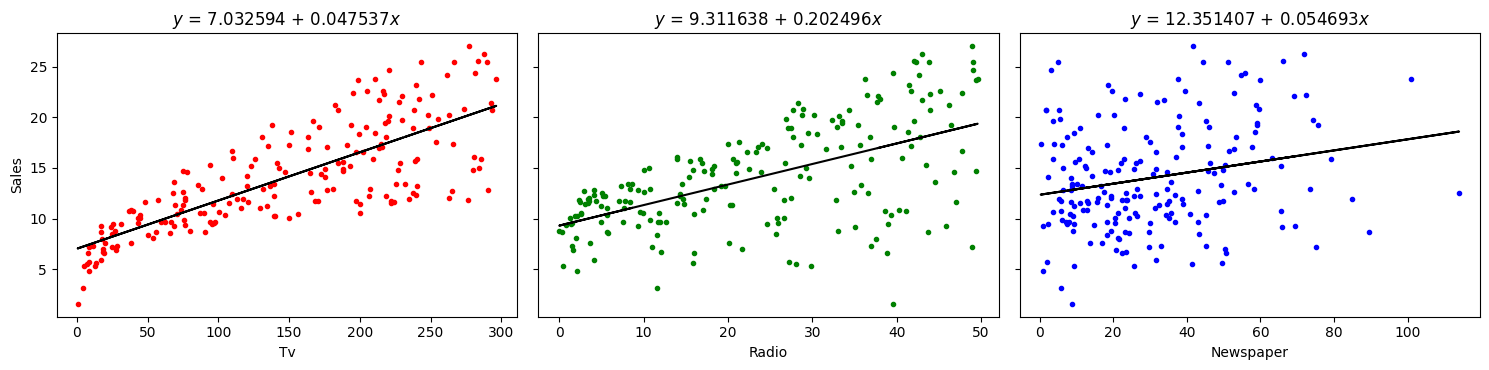

In [5]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4), sharey=True)
colors = ['red', 'green', 'blue']
columns = ['TV', 'radio', 'newspaper']

# Function for training model and plotting
def train_plot(data_df, feature, ax, c):
    # Initializing our inputs and outputs
    X = data_df[[feature]].values
    Y = data_df["sales"].values

    # Mean of inputs and outputs
    x_mean, y_mean = np.mean(X), np.mean(Y)
    n = len(X)

    # OLS formula from scratch
    num, deno = 0, 0
    for i in range(n):
        num += (X[i] - x_mean) * (Y[i] - y_mean)
        deno += (X[i] - x_mean) ** 2

    b1 = num / deno
    b0 = y_mean - (b1 * x_mean)
    y_hat = b0 + np.dot(X, b1)

    # Plot the regression line
    ax.scatter(data_df[feature], data_df["sales"], color=c, marker=".")
    ax.plot(X, y_hat, color="black")
    ax.set_xlabel(feature.capitalize())
    ax.set_ylabel("Sales" if feature == "TV" else "")
    ax.set_title(("$y$ = %4f + %4f$x$" % (b0.item(), b1.item())))

# Plotting each feature against sales
for ax, color, column in zip(axs, colors, columns):
    train_plot(df, column, ax, color)
    
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Simple Linear Regression with OLS (using scikit-learn)

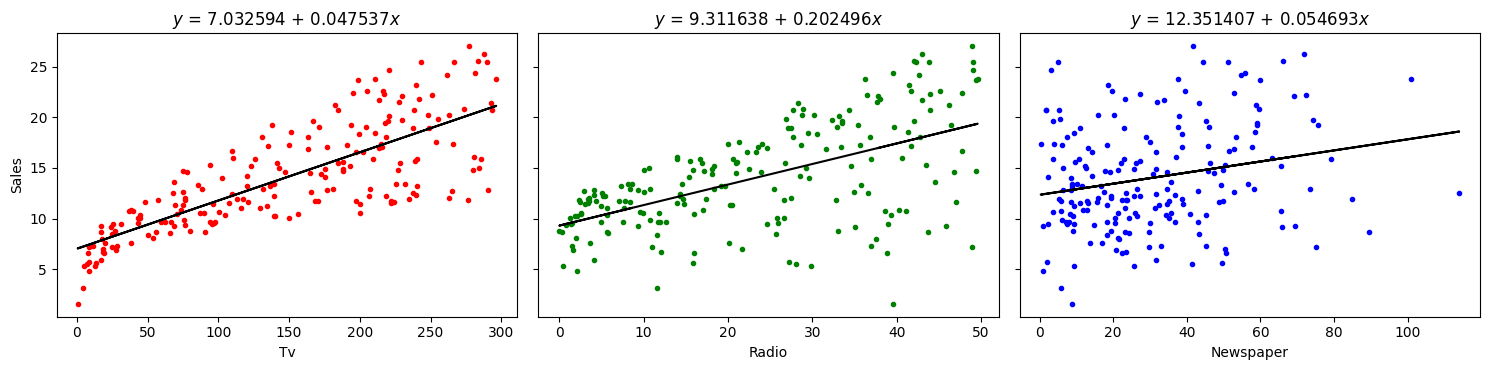

In [6]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4), sharey=True)

# Function for training model and plotting
def train_plot(data_df, feature, ax, c):
    # Initializing our inputs and outputs
    X = data_df[[feature]].values
    Y = data_df["sales"].values

    # Creating and training the model
    model = LinearRegression()
    model.fit(X, Y)

    # Predicting sales
    y_hat = model.predict(X)

    # Plot the regression line
    ax.scatter(data_df[feature], data_df["sales"], color=c, marker=".")
    ax.plot(X, y_hat, color="black")
    ax.set_xlabel(feature.capitalize())
    ax.set_ylabel("Sales" if feature == "TV" else "")
    ax.set_title(f"$y$ = {model.intercept_:.6f} + {model.coef_[0]:.6f}$x$")

# Plotting each feature against sales
for ax, color, column in zip(axs, colors, columns):
    train_plot(df, column, ax, color)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Multiple Linear Regression with OLS (from scratch)

In [7]:
# Define the features and the target
features = ['TV', 'radio']
target = 'sales'

# Initializing our inputs and outputs
X = df[features].values
y = df[target].values

# set bias and intercept terms for each sample
X = np.c_[np.ones((200, 1)), X]
X_transpose = np.transpose(X)

# OLS solution in matrxi form
betas = np.linalg.inv(X_transpose.dot(X)).dot(X_transpose).dot(y)

message = r"""
<strong>TV and Radio</strong><br>
y = {:.2f} + {:.2f}x1 + {:.2f}x2<br>
x1 = TV<br>
x2 = Radio
""".format(betas[0], betas[1], betas[2])
display(HTML(message))


In [8]:
# Define the features and the target
features = ['TV', 'radio', 'newspaper']
target = 'sales'

# Initializing our inputs and outputs
X = df[features].values
y = df[target].values

# set bias and intercept terms for each sample
X = np.c_[np.ones((200, 1)), X]
X_transpose = np.transpose(X)

# OLS solution in matrxi form
betas = np.linalg.inv(X_transpose.dot(X)).dot(X_transpose).dot(y)

message = r"""
<strong>TV, Radio and Newspaper</strong><br>
y = {:.2f} + {:.2f}x1 + {:.2f}x2 + {:.2f}x3<br>
x1 = TV<br>
x2 = Radio<br>
x3 = Newspaper
""".format(betas[0], betas[1], betas[2], betas[3])
display(HTML(message))

### Multiple Linear Regression with OLS (using scikit-learn)

In [9]:
# Define the features and the target
features = ['TV', 'radio']
target = 'sales'

# Initialize our inputs and outputs
X = df[features].values
y = df[target].values

# Create and train the model
model = LinearRegression()
model.fit(X, y)

# Extract coefficients and intercept
intercept = model.intercept_
coef = model.coef_

# Display the regression equation
message = r"""
<strong>TV and Radio</strong><br>
y = {:.2f} + {:.2f}x1 + {:.2f}x2<br>
x1 = TV<br>
x2 = Radio
""".format(intercept, coef[0], coef[1])
display(HTML(message))

In [10]:
# Define the features and the target
features = ['TV', 'radio', 'newspaper']
target = 'sales'

# Initialize our inputs and outputs
X = df[features].values
y = df[target].values

# Create and train the model
model = LinearRegression()
model.fit(X, y)

# Extract coefficients and intercept
intercept = model.intercept_
coef = model.coef_

# Display the regression equation
message = r"""
<strong>TV, Radio and Newspaper</strong><br>
y = {:.2f} + {:.2f}x1 + {:.2f}x2 + {:.2f}x3<br>
x1 = TV<br>
x2 = Radio<br>
x3 = Newspaper
""".format(intercept, coef[0], coef[1], coef[2])
display(HTML(message))

### Analysis

1. **Model without `newspaper`:**
   - Regression equation: y = 2.92 + 0.05x₁ + 0.19x₂
   - Intercept, β₀: 2.92
   - Coefficients:
     - β₁ (TV): 0.05
     - β₂ (Radio): 0.19

2. **Model with `newspaper`:**
   - Regression equation: y = 2.94 + 0.05x₁ + 0.19x₂ + 0.00x₃
   - Intercept, β₀: 2.94
   - Coefficients:
     - β₁ (TV): 0.05
     - β₂ (Radio): 0.19
     - β₃ (Newspaper): 0.00

- **Impact of Newspaper:**
  - The coefficient for Newspaper (β₃) is 0.00, indicating that Newspaper advertising does not have a significant impact on sales when considered alongside TV and Radio.
  - Changes in Newspaper spending do not affect sales, holding other variables constant.

- **Conclusion:**
  - Including Newspaper in the model does not improve its predictive power.
  - It is recommended to exclude Newspaper from the model and focus on optimizing TV and Radio advertising for better sales predictions.
